# <center> PTC Standard Test
# <center> Prepared by Denver Lloyd
# <center>8/18/2021

In [1]:
import sys
import os
import inspect
import pandas as pd
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import fivecentplots as fcp
sys.path.insert(0, r'C:\workspace\CIS_Validation\characterization')
from characterization_ams.stats_engine import stats
from characterization_ams.emva import emva
from characterization_ams.tests import image_generator
from characterization_ams.standard_tests import ptc
from characterization_ams.utilities import image
import pdb
import warnings
warnings.filterwarnings("ignore")

## Generate Images

### PTC Dataset Generation

In [13]:
gen_images = image_generator.gen_images

rows=100
cols=100
tint = 16e-3
ped_start = 168
peds = np.linspace(168, 3800, 30)
power = np.linspace(0, 10, 30)

images = []
temp = pd.DataFrame()
raw = pd.DataFrame()

for (idx, pp) in enumerate(peds):
    n_images=1000
    rfpn=105
    cfpn=101
    ctn = 15
    rtn = 12
    ptn = 20 + np.sqrt(pp)
    pfpn= 95 + 0.08 * (pp - ped_start)
    rfpn = 105 + 0.08 * (pp - ped_start)
    cfpn = 101 + 0.08 * (pp - ped_start)
    # fpn
    imgs = gen_images(cfpn=cfpn,
                      rfpn=rfpn,
                      pfpn=pfpn,
                      rtn=rtn,
                      ptn=ptn,
                      ctn=ctn,
                      rows=rows,
                      cols=cols,
                      pedestal=pp,
                      n_images=n_images)

    images.append(np.array(imgs))
    temp['Power'] = pd.Series(power[idx])
    temp['imageid'] = idx
    temp['stack size'] = n_images
    temp['rows'] = rows
    temp['cols'] = cols
    temp['tint'] = tint
    temp['Exposure [uW/cm^2*s]'] = tint * pd.Series(power[idx])
    raw = pd.concat([raw, temp]).reset_index(drop=True)

### Dataset of actual images

In [3]:
root_path = r'C:\workspace\CIS_Validation\characterization\notebooks\standard_tests\ptc_test_images'
raw_path = r'C:\workspace\CIS_Validation\characterization\notebooks\standard_tests\ptc_test_images\RAW.csv'

images=[]
for subdir, dirs, files in os.walk(root_path):
    dir_fl = [float(x) for x in dirs]
    for dir in sorted(dir_fl):
        dir_path = os.path.join(root_path, str(dir))
        stack = []
        for file in os.listdir(dir_path):
            if file.split('.')[-1] == 'tiff':
                file = os.path.join(dir_path, file)
                stack.append(image.read_tiff(file))
        images.append(np.array(stack))

raw = pd.read_csv(raw_path)


## Stats

- Here we pass a stack of images and an optional dataframe containing operating points where the index of the dataframe corresponds to the image stack index

- Below is an example of the operating point DataFrame that was generated above.

In [24]:
stats_df = ptc.get_stats(images=images,
                          df=raw,
                          rmv_black=True)
stats_df

In [29]:
stats_df

,Tot Temp Var [DN^2],Col Temp Var [DN^2],Row Temp Var [DN^2],Pix Temp Var [DN^2],Tot Var [DN^2],Col Var [DN^2],Row Var [DN^2],Pix Var [DN^2],Mean Signal [DN],Total Temp Noise [DN],...,Pix Var - Pix Dark Var [DN^2],Signal - Dark [DN],Tot Temp Noise - Tot Dark Temp Noise [DN],Col Temp Noise - Col Dark Temp Noise [DN],Row Temp Noise - Row Dark Temp Noise [DN],Pix Temp Noise - Pix Dark Temp Noise [DN],Tot FPN - Tot Dark FPN [DN],Col FPN - Col Dark FPN [DN],Row FPN - Row Dark FPN [DN],Pix FPN - Pix Dark FPN [DN]
0,1455.329869,226.976892,145.219640,1083.133337,31597.927280,10966.937717,11059.951201,9571.038362,183.577137,38.148786,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1747.755006,226.268768,146.675414,1374.810825,38220.550884,13253.076703,13265.996420,11701.477761,310.344813,41.806160,...,2130.439398,126.767676,3.657374,-0.023519,0.060251,4.167450,17.742711,10.398860,10.011805,10.341685
2,2005.772471,227.354248,146.334525,1632.083698,45406.562818,15738.281694,15633.170941,14035.110183,437.196961,44.785851,...,4464.071820,253.619824,6.637065,0.012518,0.046170,7.488065,35.330099,20.729160,19.866377,20.638187
3,2245.522308,227.620077,145.044679,1872.857552,53333.158234,18465.515638,18274.167370,16593.475226,563.888496,47.386942,...,7022.436864,380.311359,9.238156,0.021331,-0.007262,10.365533,53.181670,31.164731,30.015676,30.983980
4,2472.188921,225.528472,146.882998,2099.777450,61811.712633,21424.330562,21033.300009,19354.082063,690.606712,49.721111,...,9783.043701,507.029575,11.572325,-0.048147,0.068818,12.912338,70.861556,41.647377,39.862315,41.287265
5,2691.193137,226.844399,147.140934,2317.207804,70993.917851,24574.580623,24083.497996,22335.839232,817.346056,51.876711,...,12764.800869,633.768919,13.727925,-0.004398,0.079455,15.226394,88.688780,52.039669,50.022286,51.620112
6,2903.083180,227.274957,146.498963,2529.309260,80751.825888,27945.030373,27287.361041,25519.434474,944.285814,53.880267,...,15948.396112,760.708677,15.731481,0.009889,0.052964,17.381247,106.410599,62.444523,60.022562,61.916350
7,3109.145443,228.248003,148.175973,2732.721467,91152.608705,31492.815677,30732.154024,28927.639004,1071.003008,55.759712,...,19356.600642,887.425871,17.610926,0.042127,0.122044,19.364447,124.156845,72.739005,70.139584,72.249588
8,3306.740509,226.584763,146.614130,2933.541616,102186.629120,35331.829866,34301.112552,32553.686703,1197.739080,57.504265,...,22982.648341,1014.161943,19.355479,-0.013020,0.057721,21.251188,141.908376,83.244482,80.039293,82.594719
9,3502.846298,227.333406,145.721619,3129.791274,113862.531383,39367.230496,38122.872158,36372.428729,1324.532346,59.184849,...,26801.390367,1140.955209,21.036063,0.011827,0.020810,23.033546,159.677167,93.688622,90.084490,92.883886


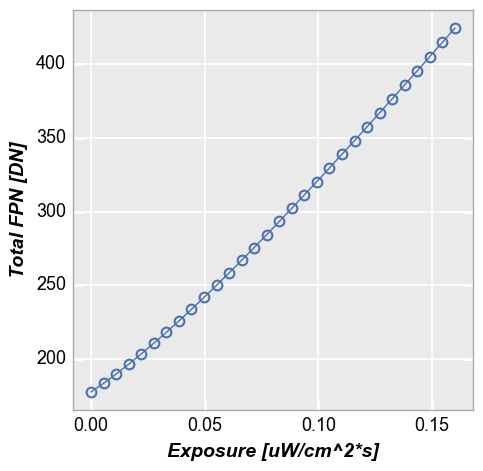

In [18]:
fcp.plot(df=stats_df, x='Exposure [uW/cm^2*s]', y='Total FPN [DN]')

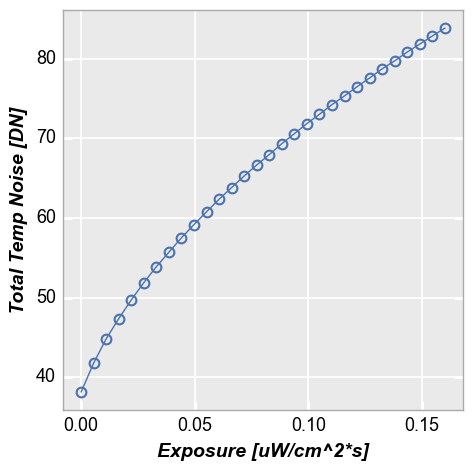

In [20]:
fcp.plot(df=stats_df, x='Exposure [uW/cm^2*s]', y='Total Temp Noise [DN]')

In [17]:
stats_df.columns.tolist()

['Tot Temp Var [DN^2]',
 'Col Temp Var [DN^2]',
 'Row Temp Var [DN^2]',
 'Pix Temp Var [DN^2]',
 'Tot Var [DN^2]',
 'Col Var [DN^2]',
 'Row Var [DN^2]',
 'Pix Var [DN^2]',
 'Mean Signal [DN]',
 'Total Temp Noise [DN]',
 'Col Temp Noise [DN]',
 'Row Temp Noise [DN]',
 'Pix Temp Noise [DN]',
 'Total FPN [DN]',
 'Col FPN [DN]',
 'Row FPN [DN]',
 'Pix FPN [DN]',
 'CFPN Ratio',
 'RFPN Ratio',
 'STN Ratio',
 'Total FPN [%]',
 'Pix FPN [%]',
 'Col FPN [%]',
 'Row FPN [%]',
 'CTN Ratio',
 'RTN Ratio',
 'Power',
 'imageid',
 'stack size',
 'rows',
 'cols',
 'tint',
 'Exposure [uW/cm^2*s]',
 'Tot Temp Var - Tot Dark Temp Var [DN^2]',
 'Col Temp Var - Col Dark Temp Var [DN^2]',
 'Row Temp Var - Row Dark Temp Var [DN^2]',
 'Pix Temp Var - Pix Dark Temp Var [DN^2]',
 'Tot Var - Tot Dark Var [DN^2]',
 'Col Var - Col Dark Var [DN^2]',
 'Row Var - Row Dark Var [DN^2]',
 'Pix Var - Pix Dark Var [DN^2]',
 'Signal - Dark [DN]',
 'Tot Temp Noise - Tot Dark Temp Noise [DN]',
 'Col Temp Noise - Col Dark Tem

### PTC

- Above a stack of images was generated for each power level and added to a list. The power and other key params were added to a DataFrame. Both to be pased to the emva calculation function.
    - It is assumed that the index of the param DataFrame corresponds to the index of the images in the list.
- The return of `ptc` is 3 DataFrames:
    - **data:** all temporal noise metrics
    - **hist:** all spatial noise metrics
    - **summ:** all summary metrics

Passing image stacks to ptc

In [4]:
data, hist, summ = ptc.ptc(images=images.copy(),
                              df=raw.copy(),
                              rmv_ttn=False,
                              hpf=False,
                              interp_exp=False)

Passing avg images, temp images, and dark images to ptc_avg

In [111]:
temp_images = []
avg_images = []
for img in images:
    ttn_var = stats.tot_var_img_stack(img)
    avg = stats.avg_img(img)
    temp_images.append(ttn_var)
    avg_images.append(avg)

dark_stack=images[0]
avg_img_cp=avg_images.copy()
temp_img_cp=temp_images.copy()
avg_img_cp.pop(0)
temp_img_cp.pop(0)
data, hist, summ = ptc.ptc_avg(images=avg_img_cp,
                              temp_imgs=temp_img_cp,
                              L=10,
                              df=raw.copy(),
                              dark_imgs=dark_stack)

Passing avg images and temp images to ptc_avg

In [12]:
temp_images = []
avg_images = []
for img in images:
    ttn_var = stats.tot_var_img_stack(img)
    avg = stats.avg_img(img)
    temp_images.append(ttn_var)
    avg_images.append(avg)


data, hist, summ = ptc.ptc_avg(images=avg_images.copy(),
                              temp_imgs=temp_images.copy(),
                              L=50,
                              df=raw.copy())

#### Available Results

##### Data Columns

In [5]:
data

,Tot Temp Var [DN^2],Col Temp Var [DN^2],Row Temp Var [DN^2],Pix Temp Var [DN^2],Tot Var [DN^2],Col Var [DN^2],Row Var [DN^2],Pix Var [DN^2],Mean Signal [DN],Total Temp Noise [DN],...,Linearity Fit [DN],Linearity Error [%],Linearity Error [DN],Responsivity Fit,SNR [dB],SNR [ratio],SNR Ideal [dB],SNR Ideal [ratio],SNR Theoretical [dB],SNR Theoretical [ratio]
0,12.076778,0.202305,6.117481,5.756992,2.075532,0.105366,0.198331,1.771835,115.589615,3.475166,...,NaN,NaN,NaN,0.022284,NaN,NaN,NaN,NaN,NaN,NaN
1,71.563073,0.250377,6.229560,65.083136,5.870843,0.737450,1.184836,3.948557,246.511343,8.459496,...,130.998711,-0.058766,-0.076983,131.306369,24.352363,16.505099,24.628400,17.038055,24.509046,16.805533
2,130.949360,0.426165,6.349855,124.173340,14.474623,2.334832,4.252444,7.887347,377.806318,11.443311,...,262.343526,-0.048343,-0.126824,262.685656,27.450741,23.579635,27.644887,24.112616,27.584884,23.946620
3,189.945794,0.355342,6.259828,183.330625,27.976726,5.371611,9.343907,13.261209,509.334248,13.782082,...,393.593165,0.038484,0.151469,393.969741,29.219831,28.906235,29.410429,29.547550,29.370379,29.411619
4,249.366534,0.414734,6.410617,242.541183,45.549977,9.127451,16.403191,20.019334,640.736853,15.791344,...,524.842803,0.058005,0.304435,525.253825,30.454301,33.320772,30.661094,34.123588,30.631030,34.005682
5,308.269064,0.506730,6.376592,301.385742,67.092125,14.267782,24.931434,27.892910,772.219199,17.557593,...,656.187619,0.067353,0.441965,656.633112,31.400719,37.156600,31.631487,38.157013,31.607427,38.051461
6,367.147001,0.486386,6.275760,360.384854,92.299054,20.242273,35.259275,36.797506,903.380940,19.161080,...,787.437257,0.044965,0.354068,787.917197,32.163966,40.569375,32.422395,41.794559,32.402331,41.698127
7,426.437372,0.447993,6.285041,419.704338,121.365249,27.607466,46.923592,46.834191,1035.185400,20.650360,...,918.686895,0.098934,0.908889,919.201282,32.805994,43.681716,33.094253,45.155706,33.077059,45.066408
8,485.855694,0.481730,6.354308,479.019657,153.509731,35.507313,60.452516,57.549903,1166.322370,22.042135,...,1049.936534,0.075835,0.796221,1050.485366,33.354105,46.527021,33.673206,48.268109,33.658154,48.184538
9,545.196974,0.498401,6.478046,538.220527,189.185857,45.145052,74.773680,69.267125,1297.901610,23.349453,...,1181.281349,0.087248,1.030646,1181.864654,33.834871,49.174908,34.185604,51.201207,34.172225,51.122400


##### Hist Columns

In [6]:
hist

,PRNU1288 Number of Pixels/Bin,PRNU1288 Deviation from Mean [DN],PRNU1288 Model,PRNU1288 Accumulated Deviation from Mean [DN],PRNU1288 Percentage of Pixels/Bin,PRNU1288 Accumulated Model,DSNU1288 Number of Pixels/Bin,DSNU1288 Deviation from Mean [DN],DSNU1288 Model,DSNU1288 Accumulated Deviation from Mean [DN],...,PRNU1288 Max Vertical,PRNU1288 Min Vertical,DSNU1288 Horizontal Cycles [periods/pixel],DSNU1288 Horizontal Power Spectrum,DSNU1288 Vertical Cycles [periods/pixel],DSNU1288 Vertical Power Spectrum,PRNU1288 Horizontal Cycles [periods/pixel],PRNU1288 Horizontal Power Spectrum,PRNU1288 Vertical Cycles [periods/pixel],PRNU1288 Vertical Power Spectrum
0,-197.92,2.0,2.324444e-89,0.0,100.000000,11117.071854,-28.099598,1.0,5.052397e-75,0.0,...,1961.18,1861.32,0.000000,9.903696,0.00000,9.277101,0.000000,19.813827,0.00000,16.055811
1,-196.84,0.0,2.388753e-88,0.8,93.302924,13165.558482,-27.099598,0.0,1.798149e-69,1.0,...,1947.04,1863.68,0.001667,1.682697,0.00125,3.914215,0.001667,6.958571,0.00125,10.178218
2,-195.76,0.0,2.423743e-87,1.6,86.594255,15300.596198,-26.099598,0.0,4.027319e-64,2.0,...,1957.24,1851.24,0.003333,1.524980,0.00250,2.596010,0.003333,2.522768,0.00250,3.487454
3,-194.68,0.0,2.428091e-86,2.4,79.971586,17450.087710,-25.099598,0.0,5.676338e-59,3.0,...,1953.28,1857.12,0.005000,1.666037,0.00375,1.873868,0.005000,4.191658,0.00375,3.944117
4,-193.60,0.0,2.401632e-85,3.2,73.572772,19530.216965,-24.099598,0.0,5.034803e-54,4.0,...,1954.54,1853.84,0.006667,1.416682,0.00500,1.979146,0.006667,2.700031,0.00500,4.486865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1896.98,1801.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1892.56,1803.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1900.02,1796.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1908.72,1801.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Summ Columns

In [7]:
summ.T

,0
System Gain [DN/e],0.450995
Conversion Factor [e/DN],2.217320
Total Dark Temporal Noise [DN],3.463155
Total Dark Temporal Noise [e],7.678922
Col Dark Temporal Noise [e],0.997313
Row Dark Temporal Noise [e],5.484217
Pix Dark Temporal Noise [e],5.320177
Total DSNU [DN],1.417942
Row DSNU [DN],0.464008
Col DSNU [DN],0.338126


#### Noise Metrics

##### Spatial Variance

In [8]:
data[['Tot Var [DN^2]','Col Var [DN^2]','Row Var [DN^2]','Pix Var [DN^2]',
      'Tot Var - Tot Dark Var [DN^2]','Col Var - Col Dark Var [DN^2]',
      'Row Var - Row Dark Var [DN^2]','Pix Var - Pix Dark Var [DN^2]']].head()

,Tot Var [DN^2],Col Var [DN^2],Row Var [DN^2],Pix Var [DN^2],Tot Var - Tot Dark Var [DN^2],Col Var - Col Dark Var [DN^2],Row Var - Row Dark Var [DN^2],Pix Var - Pix Dark Var [DN^2]
0,2.075532,0.105366,0.198331,1.771835,0.000000,0.000000,0.000000,0.000000
1,5.870843,0.737450,1.184836,3.948557,3.795311,0.632084,0.986505,2.176722
2,14.474623,2.334832,4.252444,7.887347,12.399092,2.229466,4.054113,6.115512
3,27.976726,5.371611,9.343907,13.261209,25.901194,5.266245,9.145576,11.489374
4,45.549977,9.127451,16.403191,20.019334,43.474445,9.022085,16.204860,18.247499


In [9]:
data[['Tot Var [e^2]','Col Var [e^2]','Row Var [e^2]','Pix Var [e^2]',
      'Tot Var - Tot Dark Var [e^2]','Col Var - Col Dark Var [e^2]',
      'Row Var - Row Dark Var [e^2]','Pix Var - Pix Dark Var [e^2]']].head()

,Tot Var [e^2],Col Var [e^2],Row Var [e^2],Pix Var [e^2],Tot Var - Tot Dark Var [e^2],Col Var - Col Dark Var [e^2],Row Var - Row Dark Var [e^2],Pix Var - Pix Dark Var [e^2]
0,10.204365,0.518032,0.975095,8.711238,0.000000,0.000000,0.000000,0.000000
1,28.864038,3.625677,5.825256,19.413106,18.659672,3.107644,4.850160,10.701868
2,71.164577,11.479218,20.907169,38.778190,60.960212,10.961186,19.932074,30.066952
3,137.547751,26.409557,45.939377,65.198817,127.343385,25.891525,44.964282,56.487579
4,223.946746,44.875172,80.646394,98.425181,213.742381,44.357140,79.671298,89.713943


##### Temporal Variance

In [10]:
data[['Tot Temp Var [DN^2]','Col Temp Var [DN^2]','Row Temp Var [DN^2]','Pix Temp Var [DN^2]',
      'Tot Temp Var - Tot Dark Temp Var [DN^2]','Col Temp Var - Col Dark Temp Var [DN^2]',
      'Row Temp Var - Row Dark Temp Var [DN^2]','Pix Temp Var - Pix Dark Temp Var [DN^2]']].head()

,Tot Temp Var [DN^2],Col Temp Var [DN^2],Row Temp Var [DN^2],Pix Temp Var [DN^2],Tot Temp Var - Tot Dark Temp Var [DN^2],Col Temp Var - Col Dark Temp Var [DN^2],Row Temp Var - Row Dark Temp Var [DN^2],Pix Temp Var - Pix Dark Temp Var [DN^2]
0,12.076778,0.202305,6.117481,5.756992,0.000000,0.000000,0.000000,0.000000
1,71.563073,0.250377,6.229560,65.083136,59.486295,0.048072,0.112079,59.326144
2,130.949360,0.426165,6.349855,124.173340,118.872582,0.223860,0.232374,118.416348
3,189.945794,0.355342,6.259828,183.330625,177.869017,0.153037,0.142347,177.573633
4,249.366534,0.414734,6.410617,242.541183,237.289756,0.212429,0.293137,236.784191


In [11]:
data[['Tot Temp Var [e^2]','Col Temp Var [e^2]','Row Temp Var [e^2]','Pix Temp Var [e^2]',
      'Tot Temp Var - Tot Dark Temp Var [e^2]','Col Temp Var - Col Dark Temp Var [e^2]',
      'Row Temp Var - Row Dark Temp Var [e^2]','Pix Temp Var - Pix Dark Temp Var [e^2]']].head()

,Tot Temp Var [e^2],Col Temp Var [e^2],Row Temp Var [e^2],Pix Temp Var [e^2],Tot Temp Var - Tot Dark Temp Var [e^2],Col Temp Var - Col Dark Temp Var [e^2],Row Temp Var - Row Dark Temp Var [e^2],Pix Temp Var - Pix Dark Temp Var [e^2]
0,59.375554,0.994634,30.076632,28.304288,0.000000,0.000000,0.000000,0.000000
1,351.840298,1.230978,30.627671,319.981649,292.464744,0.236344,0.551039,291.677361
2,643.813352,2.095245,31.219102,610.499005,584.437798,1.100611,1.142471,582.194716
3,933.869692,1.747041,30.776481,901.346169,874.494138,0.752407,0.699850,873.041881
4,1226.012130,2.039041,31.517840,1192.455249,1166.636576,1.044407,1.441208,1164.150961


##### Noise Ratios

In [12]:
data[['CFPN Ratio','CTN Ratio','RFPN Ratio','RTN Ratio']]

,CFPN Ratio,CTN Ratio,RFPN Ratio,RTN Ratio
0,10.706,7.726,7.803,1.405
1,9.851,16.906,7.772,3.389
2,7.489,17.529,5.549,4.541
3,5.947,23.120,4.509,5.509
4,5.227,24.521,3.899,6.237
5,4.648,24.665,3.516,6.953
6,4.259,27.474,3.227,7.649
7,3.930,30.853,3.015,8.237
8,3.699,31.758,2.835,8.744
9,3.475,33.074,2.700,9.174


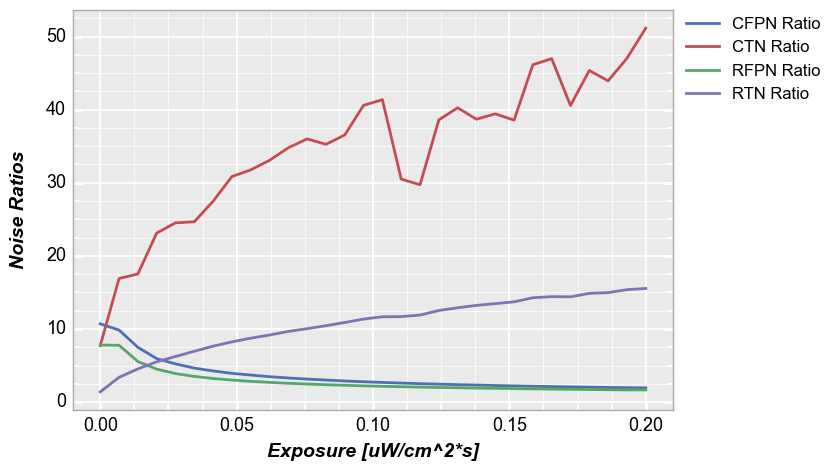

In [13]:
fcp.plot(df=data, y=['CFPN Ratio','CTN Ratio','RFPN Ratio','RTN Ratio'], x=['Exposure [uW/cm^2*s]'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2, label_y='Noise Ratios')

##### FPN as % of Signal

In [14]:
data[['Pix FPN [%]',
      'Total FPN [%]',
      'Col FPN [%]',
      'Row FPN [%]',
      'Exposure [uW/cm^2*s]']]

,Pix FPN [%],Total FPN [%],Col FPN [%],Row FPN [%],Exposure [uW/cm^2*s]
0,1.152,1.246,0.281,0.385,0.000000
1,0.806,0.983,0.348,0.442,0.006895
2,0.743,1.007,0.404,0.546,0.013795
3,0.715,1.038,0.455,0.600,0.020690
4,0.698,1.053,0.472,0.632,0.027585
5,0.684,1.061,0.489,0.647,0.034485
6,0.671,1.063,0.498,0.657,0.041380
7,0.661,1.064,0.508,0.662,0.048275
8,0.650,1.062,0.511,0.667,0.055170
9,0.641,1.060,0.518,0.666,0.062070


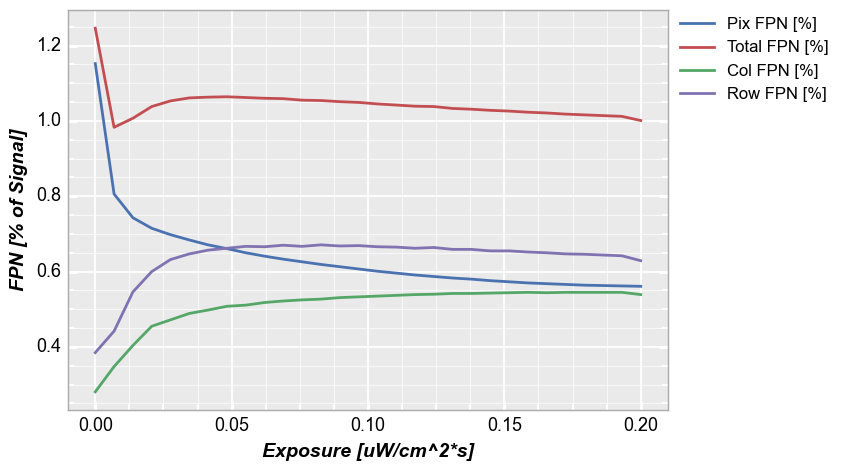

In [15]:
fcp.plot(df=data, y=['Pix FPN [%]', 'Total FPN [%]','Col FPN [%]','Row FPN [%]'], x=['Exposure [uW/cm^2*s]'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2, label_y='FPN [% of Signal]')

#### Data (Temporal Noise Metrics)

##### Response

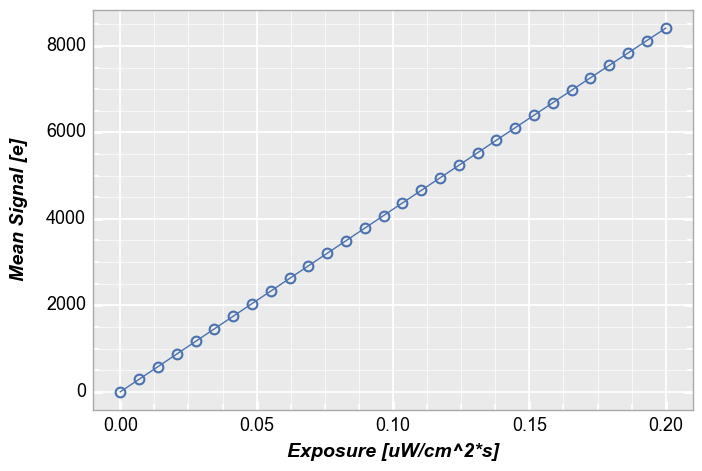

In [16]:
fcp.plot(df=data, y=['Mean Signal [e]'], x=['Exposure [uW/cm^2*s]'],
         ax_size=[600,400], grid_minor=True)

##### Sensitivity

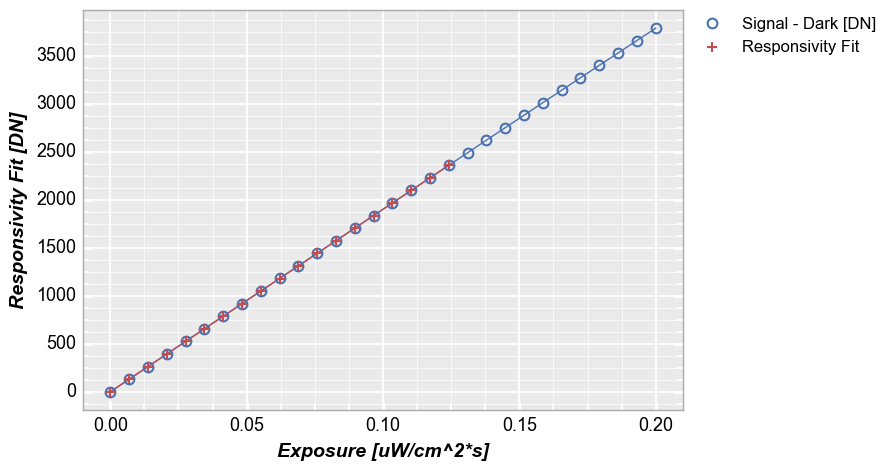

In [17]:
fcp.plot(df=data, y=['Signal - Dark [DN]','Responsivity Fit'], x=['Exposure [uW/cm^2*s]'],
         ax_size=[600,400], grid_minor=True, label_y = 'Responsivity Fit [DN]')

##### Photon Transfer

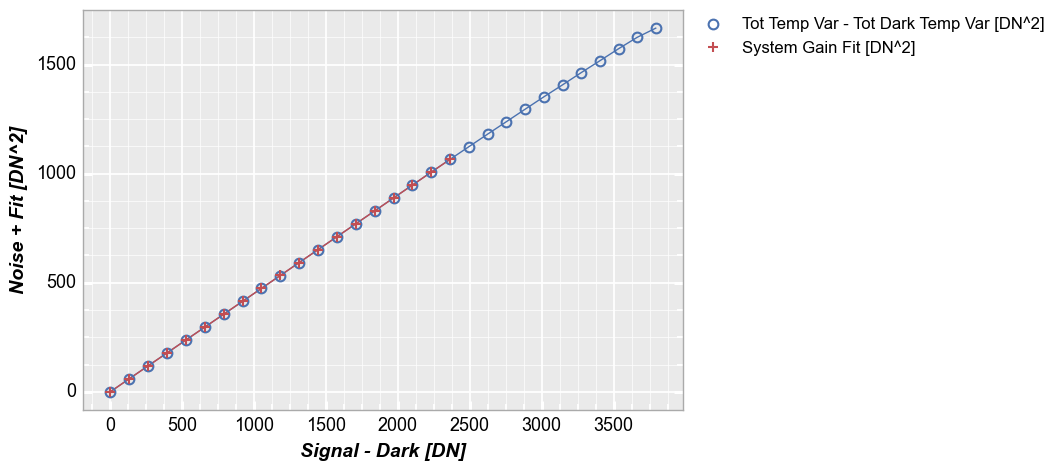

In [18]:
fcp.plot(df=data, x='Signal - Dark [DN]', y=['Tot Temp Var - Tot Dark Temp Var [DN^2]','System Gain Fit [DN^2]'],
         ax_size=[600,400], grid_minor=True, label_y='Noise + Fit [DN^2]')

##### SNR

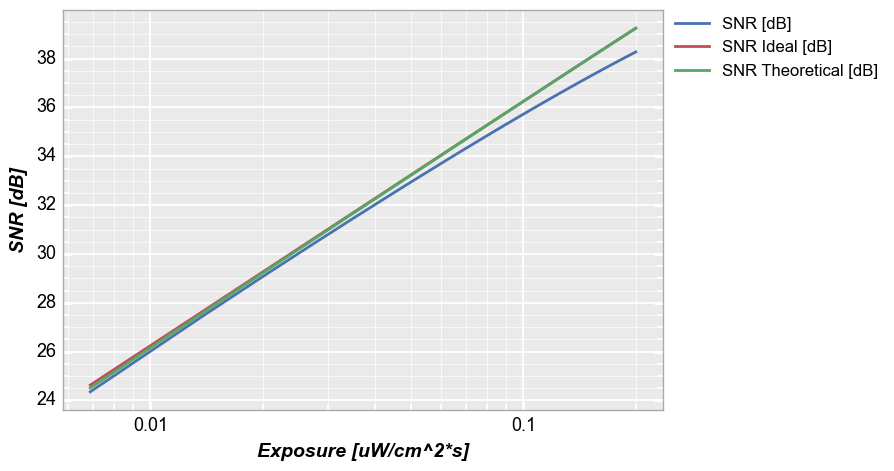

In [19]:
fcp.plot(df=data, y=['SNR [dB]','SNR Ideal [dB]', 'SNR Theoretical [dB]'], x=['Exposure [uW/cm^2*s]'],
         ax_size=[600,400], grid_minor=True, ax_scale='logx', markers=False, line_width=2, label_y='SNR [dB]')

##### Linearity

###### Linearity Fit

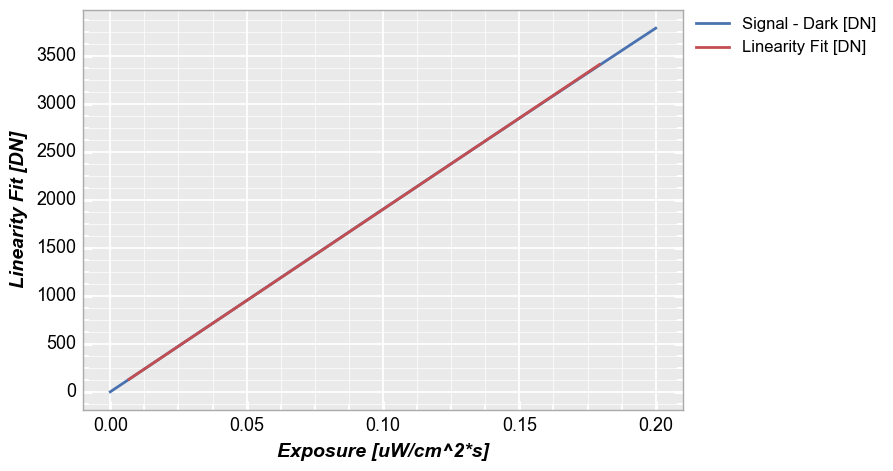

In [20]:
fcp.plot(df=data, x='Exposure [uW/cm^2*s]', y=['Signal - Dark [DN]','Linearity Fit [DN]'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2, label_y='Linearity Fit [DN]')

###### Linearity Error [%]

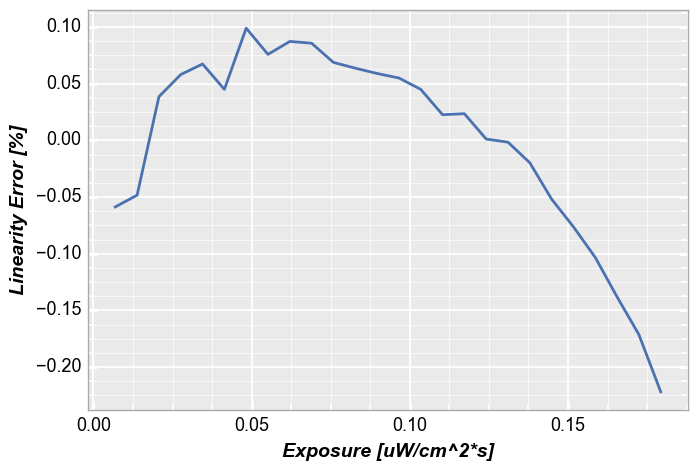

In [21]:
fcp.plot(df=data, x='Exposure [uW/cm^2*s]', y=['Linearity Error [%]'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2,
         filter='Linearity Error [%] > -95')

###### Linearity Error [DN]

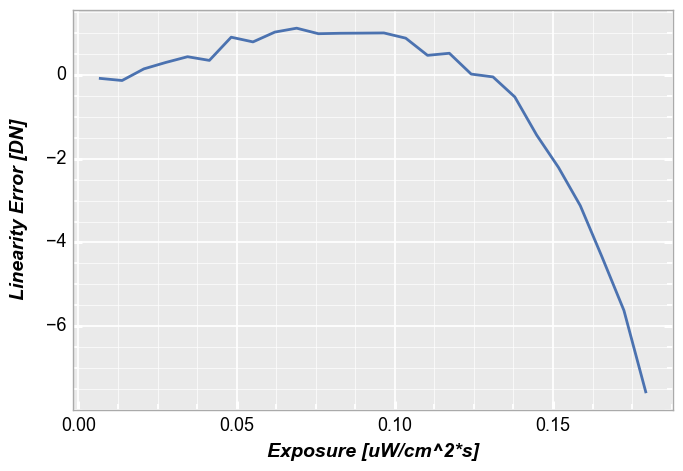

In [22]:
fcp.plot(df=data, x='Exposure [uW/cm^2*s]', y=['Linearity Error [DN]'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2,
         filter='Linearity Error [%] > -95')

#### Hist (Spatial Noise Metrics)

##### Histograms

###### DSNU Histogram

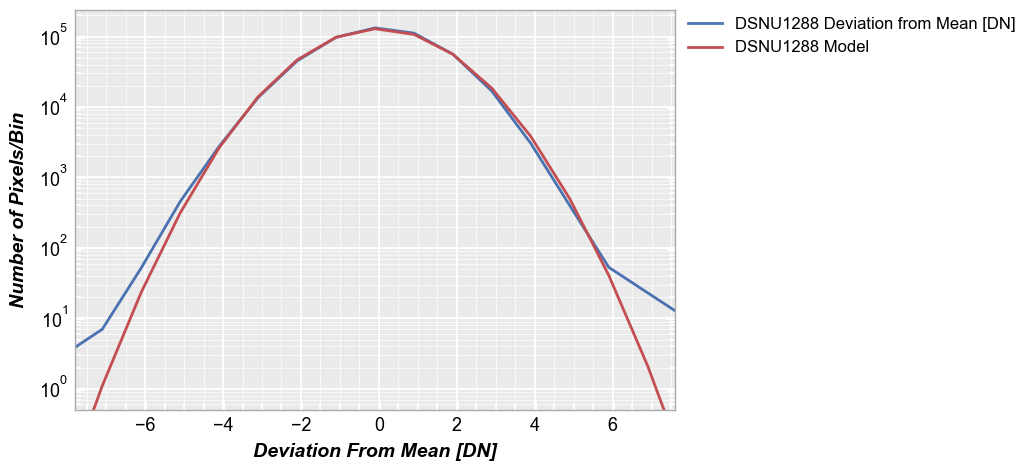

In [23]:
fcp.plot(df=hist, x='DSNU1288 Number of Pixels/Bin', y=['DSNU1288 Deviation from Mean [DN]','DSNU1288 Model'], ax_scale='logy',
         ax_size=[600,400], grid_minor=True, ymin=0.5, label_x='Deviation From Mean [DN]',
         label_y='Number of Pixels/Bin', markers=False, line_width=2)

###### DSNU Accumulated Histogram

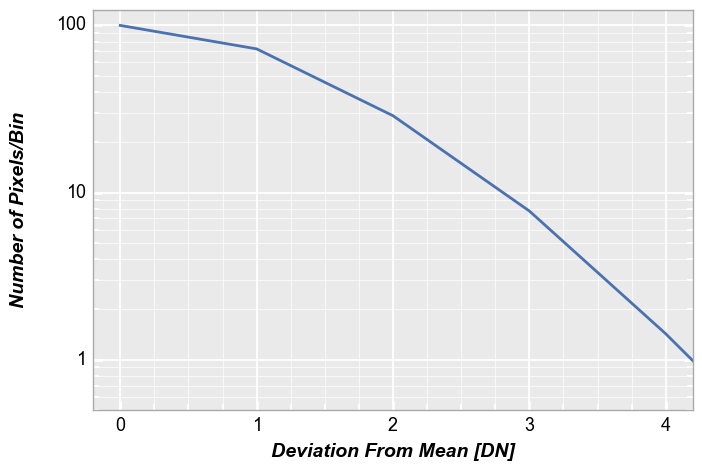

In [24]:
fcp.plot(df=hist, y='DSNU1288 Percentage of Pixels/Bin', x=['DSNU1288 Accumulated Deviation from Mean [DN]'], ax_scale='logy',
         ax_size=[600,400], grid_minor=True, ymin=0.5, label_x='Deviation From Mean [DN]',
         label_y='Number of Pixels/Bin', markers=False, line_width=2)

###### PRNU Histogram

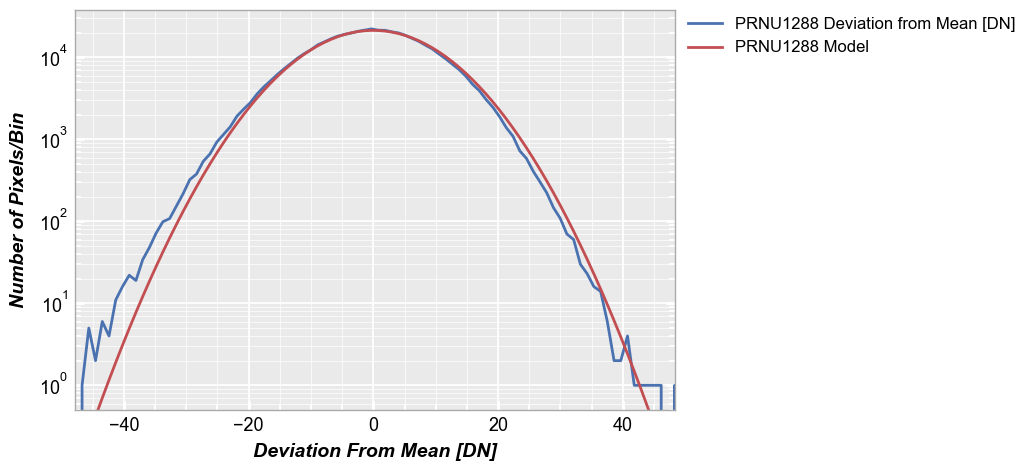

In [25]:
fcp.plot(df=hist, x='PRNU1288 Number of Pixels/Bin', y=['PRNU1288 Deviation from Mean [DN]','PRNU1288 Model'], ax_scale='logy',
         ax_size=[600,400], grid_minor=True, ymin=0.5, label_x='Deviation From Mean [DN]',
         label_y='Number of Pixels/Bin', markers=False, line_width=2)

###### DSNU Accumulated Histogram

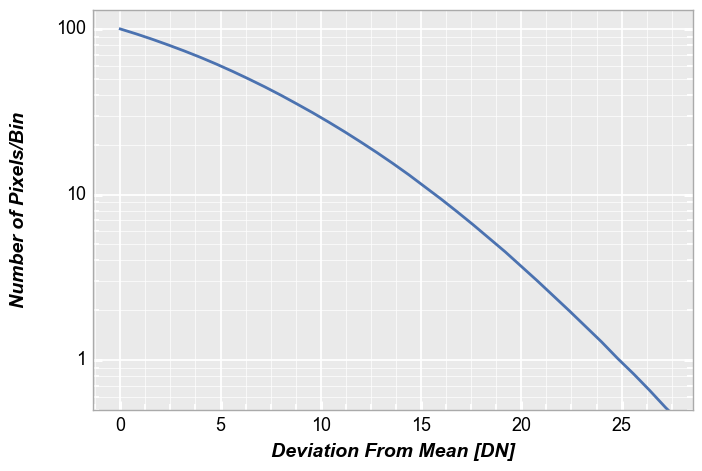

In [26]:
fcp.plot(df=hist, y='PRNU1288 Percentage of Pixels/Bin', x=['PRNU1288 Accumulated Deviation from Mean [DN]'], ax_scale='logy',
         ax_size=[600,400], grid_minor=True, ymin=0.5, label_x='Deviation From Mean [DN]',
         label_y='Number of Pixels/Bin', markers=False, line_width=2)

##### Profiles

###### DSNU Horizontal

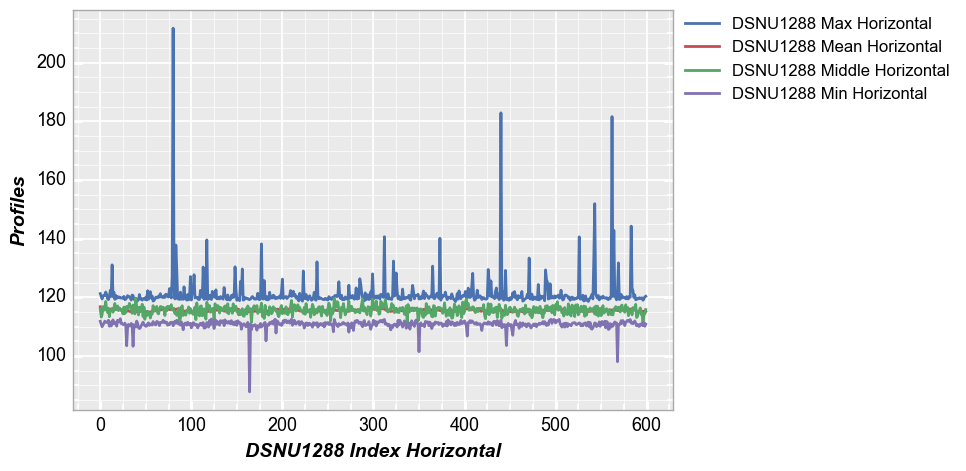

In [27]:
fcp.plot(df=hist, x='DSNU1288 Index Horizontal', 
         y=['DSNU1288 Max Horizontal','DSNU1288 Mean Horizontal',
            'DSNU1288 Middle Horizontal','DSNU1288 Min Horizontal'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2, label_y='Profiles')

###### DSNU Vertical

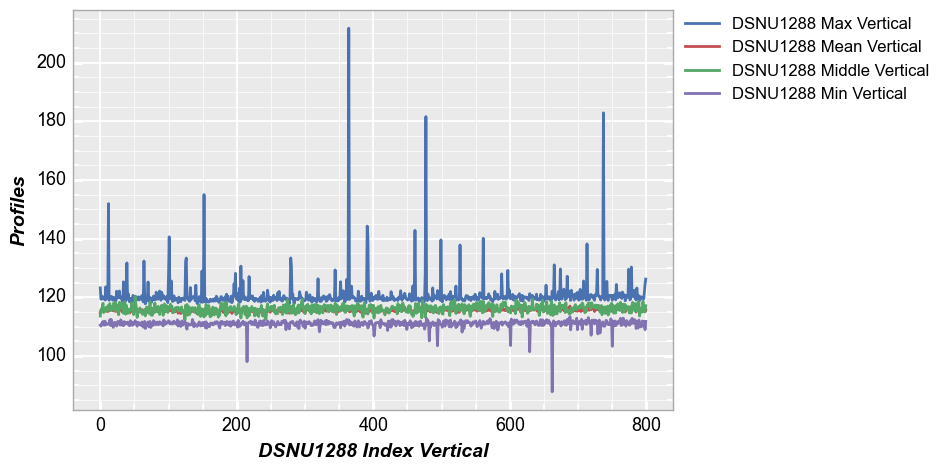

In [28]:
fcp.plot(df=hist, x='DSNU1288 Index Vertical', 
         y=['DSNU1288 Max Vertical','DSNU1288 Mean Vertical',
            'DSNU1288 Middle Vertical','DSNU1288 Min Vertical'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2, label_y='Profiles')

###### PRNU Horizontal

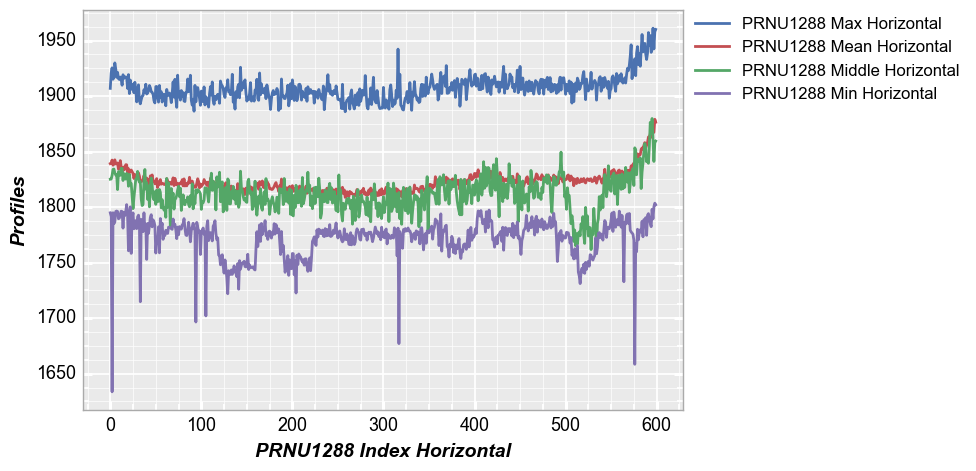

In [29]:
fcp.plot(df=hist, x='PRNU1288 Index Horizontal', 
         y=['PRNU1288 Max Horizontal','PRNU1288 Mean Horizontal',
            'PRNU1288 Middle Horizontal','PRNU1288 Min Horizontal'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2, label_y='Profiles')

###### PRNU Vertical

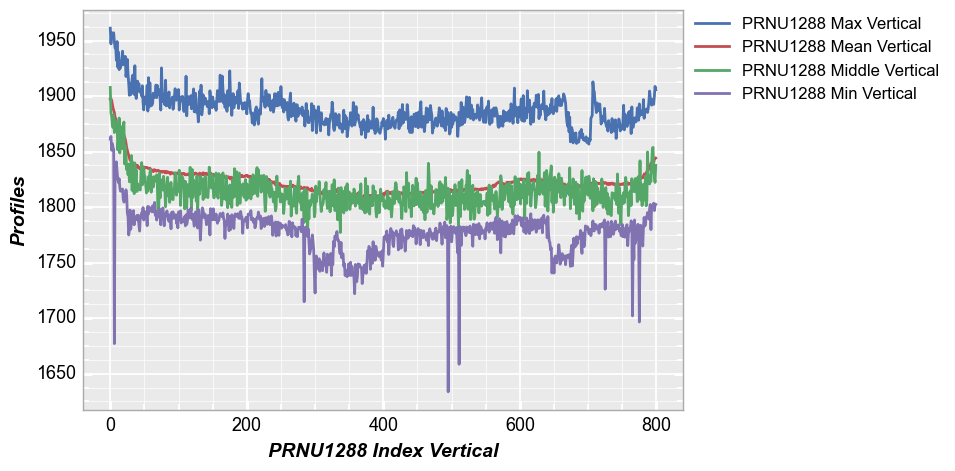

In [30]:
fcp.plot(df=hist, x='PRNU1288 Index Vertical', 
         y=['PRNU1288 Max Vertical','PRNU1288 Mean Vertical',
            'PRNU1288 Middle Vertical','PRNU1288 Min Vertical'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2, label_y='Profiles')

##### Spectrograms

###### DSNU Horizontal

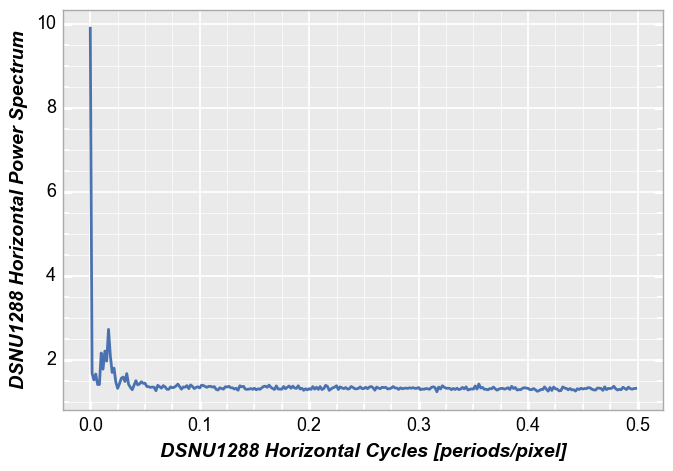

In [31]:
fcp.plot(df=hist, x='DSNU1288 Horizontal Cycles [periods/pixel]', y=['DSNU1288 Horizontal Power Spectrum'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2)

###### DSNU Vertical

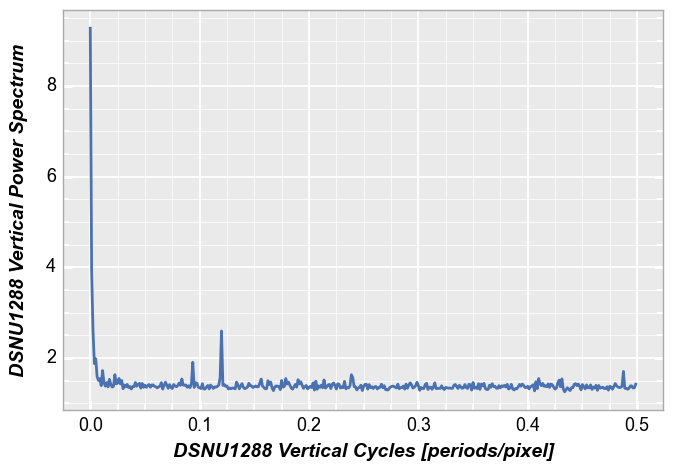

In [32]:
fcp.plot(df=hist, x='DSNU1288 Vertical Cycles [periods/pixel]', y=['DSNU1288 Vertical Power Spectrum'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2)

###### PRNU Horizontal

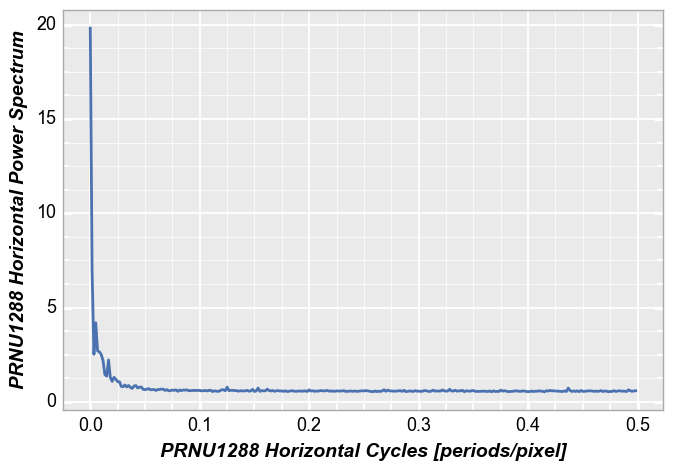

In [33]:
fcp.plot(df=hist, x='PRNU1288 Horizontal Cycles [periods/pixel]', y=['PRNU1288 Horizontal Power Spectrum'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2)

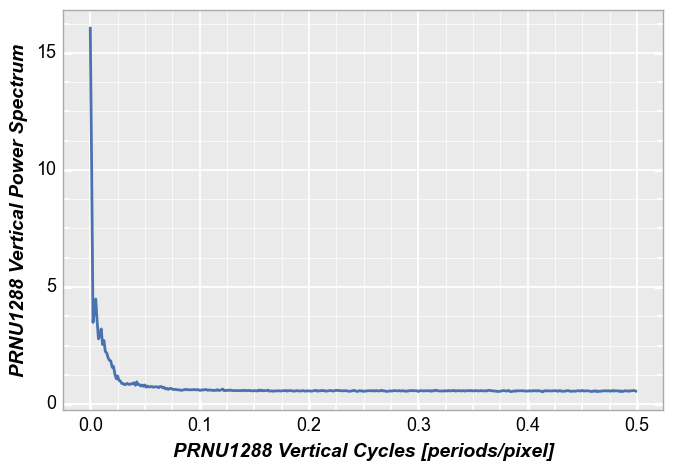

In [34]:
fcp.plot(df=hist, x='PRNU1288 Vertical Cycles [periods/pixel]', y=['PRNU1288 Vertical Power Spectrum'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2)